In [95]:
import numpy as np
import pandas as pd
import requests
import time
import os.path
import re
from ediblepickle import checkpoint
import string
from bs4 import BeautifulSoup

In [2]:
# import data from NYC Property Valuation and Assessment data 
data = pd.read_csv('valid_address.csv')

/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,53,87,90,93,97,100,106,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
address = pd.read_csv('address_book.csv')

/opt/conda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
address.head()

,BBLE,STREET_NUM,STREET_NAME,ZIP,ZILLOW_LINK,VALUE,YEAR_BUILT,ZILLOW_STATUS,LATITUDE,LONGITUTDE,ZILLOW_ID,SCHOOL_RATING
0,1000750043,26,CLIFF STREET,10038,NaN,8530000,1974,NaN,NaN,NaN,NaN,NaN
1,1000780040,86,NASSAU STREET,10038,NaN,6080000,1910,NaN,NaN,NaN,NaN,NaN
2,1000970017,211,FRONT STREET,10038,NaN,4340000,1900,NaN,NaN,NaN,NaN,NaN
3,1000970036,226,FRONT STREET,10038,NaN,5730000,1901,NaN,NaN,NaN,NaN,NaN
4,1000970044,136,BEEKMAN STREET,10038,NaN,2220000,1998,NaN,NaN,NaN,NaN,NaN


In [5]:
data.head()

,BBLE,BORO,BLOCK,LOT,EASE,SECVOL,DISTRICT,YEAR4,CUR_FV_L,CUR_FV_T,...,O_APPLIC,REUC,GEO_RC,COOP_NUM,EX_INDS,EX_COUNT,EX_CHGDT,DCHGDT,SM_CHGDT,PER_SQFT
0,1000750043,1.0,75.0,43.0,NaN,102.0,88,2009.0,4950000.0,8530000.0,...,NaN,NaN,0,0.0,NaN,0.0,00/00/0000,03/19/2009,01/01/2010,1332.812500
1,1000780040,1.0,78.0,40.0,NaN,102.0,88,2009.0,4490000.0,6080000.0,...,NaN,NaN,0,0.0,NaN,0.0,00/00/0000,03/22/2007,01/01/2010,1468.599034
2,1000970017,1.0,97.0,17.0,NaN,103.0,88,2009.0,2390000.0,4340000.0,...,1.0,NaN,0,0.0,NaN,0.0,00/00/0000,03/19/2010,01/01/2010,875.000000
3,1000970036,1.0,97.0,36.0,NaN,103.0,88,2009.0,3150000.0,5730000.0,...,NaN,NaN,0,0.0,EEEE,1.0,00/00/0000,03/26/2008,01/01/2010,868.181818
4,1000970044,1.0,97.0,44.0,NaN,103.0,88,2009.0,1220000.0,2220000.0,...,NaN,NaN,0,0.0,NaN,0.0,00/00/0000,12/31/2004,01/01/2010,792.857143


In [ ]:
address = pd.DataFrame(data, columns=['HNUM_LO'].astype(int))

In [361]:
# strip leading zeros
address.STREET_NUM = [re.sub("^0+","",i) for i in data.HNUM_LO ]

In [403]:
# take out dash to fit the zillow format
address.STREET_NUM = [i.replace(' ','') for i in address.STREET_NUM ]

In [471]:
address 

,BBLE,STREET_NUM,STREET_NAME,ZIP,ZILLOW_LINK,VALUE,YEAR_BUILT,ZILLOW_STATUS,LATITUDE,LONGITUTDE,ZILLOW_ID,SCHOOL_RATING
0,1000750043,26,CLIFF STREET,10038,NaN,8530000,1974,NaN,NaN,NaN,NaN,NaN
1,1000780040,86,NASSAU STREET,10038,NaN,6080000,1910,NaN,NaN,NaN,NaN,NaN
2,1000970017,211,FRONT STREET,10038,NaN,4340000,1900,NaN,NaN,NaN,NaN,NaN
3,1000970036,226,FRONT STREET,10038,NaN,5730000,1901,NaN,NaN,NaN,NaN,NaN
4,1000970044,136,BEEKMAN STREET,10038,NaN,2220000,1998,NaN,NaN,NaN,NaN,NaN
5,1000970045,134,BEEKMAN STREET,10038,NaN,2010000,1901,NaN,NaN,NaN,NaN,NaN
6,1000970055,245,WATER STREET,10038,NaN,4500000,1900,NaN,NaN,NaN,NaN,NaN
7,1000970144,138,BEEKMAN STREET,10038,NaN,2220000,1988,NaN,NaN,NaN,NaN,NaN
8,1001060002,276,WATER STREET,10038,NaN,340000,2008,NaN,NaN,NaN,NaN,NaN
9,1001060006,268,WATER STREET,10038,NaN,4410000,1900,NaN,NaN,NaN,NaN,NaN


In [111]:
filename = 'address_book.csv'
address.to_csv(filename, index=False)

In [356]:
address['STREET_NUM'] = data.HNUM_LO

In [338]:
address['ZIP'] = address["ZIP"].astype(int)

In [49]:
address = address[['BBLE', 'STREET_NUM', 'STREET_NAME', 'ZIP']]

In [470]:
address['ZILLOW_LINK'] = np.nan
address['ZILLOW_ID'] = np.nan
address['ZILLOW_STATUS'] = np.nan
address['LATITUDE'] = np.nan
address['SCHOOL_RATING'] = np.nan

In [220]:
address.drop('ZILLOW_ADDRESS', axis=1, inplace=True)

In [316]:
address.head()

,BBLE,STREET_NUM,STREET_NAME,ZIP,ZILLOW_LINK,VALUE,YEAR_BUILT,ZILLOW_STATUS,LATITUDE,LONGITUTDE,ZILLOW_ID
0,1000750043,26,CLIFF STREET,10038,NaN,8530000,1974,NaN,NaN,NaN,NaN
1,1000780040,86,NASSAU STREET,10038,NaN,6080000,1910,NaN,NaN,NaN,NaN
2,1000970017,211,FRONT STREET,10038,NaN,4340000,1900,NaN,NaN,NaN,NaN
3,1000970036,226,FRONT STREET,10038,NaN,5730000,1901,NaN,NaN,NaN,NaN
4,1000970044,136,BEEKMAN STREET,10038,NaN,2220000,1998,NaN,NaN,NaN,NaN


In [112]:
short_list = [11354, 11220, 10002, 11355, 11214]
selected_address = address.loc[address['ZIP'].isin([11354])]

In [113]:
len(selected_address)

3964

In [114]:
selected_address = selected_address[selected_address.VALUE < 500000]
selected_address = selected_address[selected_address.VALUE > 200000]

In [78]:
selected_address.iloc[5].ZILLOW_ID

'2142076795'

In [67]:
error = address[address.ZILLOW_ID == 'ERROR']
len(error)

0

In [45]:
# change the value of column by condition
address.ix[address.ZILLOW_ID == "ERROR", 'ZILLOW_ID'] = np.nan

In [298]:
selected_address.head()

,BBLE,STREET_NUM,STREET_NAME,ZIP,ZILLOW_LINK,VALUE,YEAR_BUILT,ZILLOW_STATUS,LATITUDE,LONGITUTDE,ZILLOW_ID,SCHOOL_RATING
370640,4042521001,2544,120 STREET,11354,http://www.zillow.com/homedetails/2544-120th-S...,326115,1985,Off Market,40.776428,-73.848079,32025050,"[6, 2, 9]"
370641,4042521002,2542,120 STREET,11354,http://www.zillow.com/homedetails/2542-120th-S...,305568,1984,Off Market,40.776901,-73.847991,2140233337,"[6, 2, 9]"
370642,4042521003,2540,120 STREET,11354,http://www.zillow.com/homedetails/2540-120th-S...,305568,0,Off Market,40.776465,-73.848076,32025052,"[6, 2, 9]"
370643,4042521004,2538,120 STREET,11354,http://www.zillow.com/homedetails/2538-120th-S...,305568,0,Off Market,40.776901,-73.847991,2142427196,"[6, 2, 9]"
370644,4042521005,2536,120 STREET,11354,http://www.zillow.com/homedetails/2536-120th-S...,305568,0,Off Market,40.776502,-73.848074,32025054,"[6, 2, 9]"


In [15]:
address.iloc[370640]

BBLE             4042521001
STREET_NUM             2544
STREET_NAME      120 STREET
ZIP                   11354
ZILLOW_LINK             NaN
VALUE                326115
YEAR_BUILT             1985
ZILLOW_STATUS           NaN
LATITUDE                NaN
LONGITUTDE         -73.8481
ZILLOW_ID             ERROR
SCHOOL_RATING           NaN
Name: 370640, dtype: object

In [300]:
address_Z = '2534 120 STREET'
zipcode_Z = '11354'
address_Z,zipcode_Z

('2534 120 STREET', '11354')

In [345]:
zillow_data = ZillowWrapper(YOUR_ZILLOW_API_KEY)
deep_search_response = zillow_data.get_deep_search_results(address_Z, zipcode_Z)
result = GetDeepSearchResults(deep_search_response)

In [346]:
result.home_detail_link

'http://www.zillow.com/homedetails/2534-120th-St-Flushing-NY-11354/2142076795_zpid/'

In [391]:
# zillow API function, have 1000 request per day limit
# only use after getting small number of interested properties

from pyzillow.pyzillow import ZillowWrapper, GetDeepSearchResults, GetUpdatedPropertyDetails
# pyzillow 
# https://github.com/hanneshapke/pyzillow

YOUR_ZILLOW_API_KEY = 'X1-ZWz1fcz57zvjt7_6jziz'

for i in range(len(selected_address)):
    BBLE = selected_address.BBLE.iloc[i]
    index = selected_address[selected_address['BBLE'] == BBLE].index.values[0]
    
    print index
    if pd.isnull(address.iloc[index].ZILLOW_ID):
    
        # sometimes zillow API wrapper dones't accept address/zipcode, even though they are strings
        try:
            # convert process street numbers for zillow API wrapper
            street_num = selected_address.iloc[i]['STREET_NUM']
            street_name = selected_address.iloc[i]['STREET_NAME']

            # assing address and zipcode
            address_Z = str(street_num) + ' ' + str(street_name)
            zipcode_Z = str(selected_address.iloc[i]['ZIP'])

            #use zillow API wrapper to get website link for this property
            zillow_data = ZillowWrapper(YOUR_ZILLOW_API_KEY)
            deep_search_response = zillow_data.get_deep_search_results(address_Z, zipcode_Z)
            result = GetDeepSearchResults(deep_search_response)

            # find the index of the current address
            BBLE = selected_address.BBLE.iloc[i]
            index = selected_address[selected_address['BBLE'] == BBLE].index.values[0]

            address['ZILLOW_LINK'].iloc[index] = result.home_detail_link
            address['ZILLOW_ID'].iloc[index] = result.zillow_id
            address['LATITUDE'].iloc[index] = result.latitude
            address['LONGITUTDE'].iloc[index] = result.longitude
        except:
            address['ZILLOW_ID'].iloc[index] = "ERROR"
            print "error on line", i
            pass

69
70
71
72
73
75
77
78
80
82
83
84
85
86
87
88
89
90
91
93
95
97
99
101
103
105
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125


In [404]:
import csv
cw = csv.writer(open("streetnum.csv",'w'))
cw.writerow(list(set(address.STREET_NUM)))

In [419]:
# imported the NYC restaurant inspection data to look at nearby restaurants
food = pd.read_csv('NYC_Restaurant_inspection.csv')

In [421]:
clean = food.drop_duplicates(subset = 'DBA')

In [415]:
clean_food = food.loc[food['GRADE'] == 'A']

In [438]:
clean_food

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,SCORE,GRADE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,7188924968,Bakery,10.0,A
14,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE ...,11225,7182875005,Hamburgers,12.0,A
33,30191841,DJ REYNOLDS PUB AND RESTAURANT,MANHATTAN,351,WEST 57 STREET ...,10019,2122452912,Irish,8.0,A
42,40356018,RIVIERA CATERER,BROOKLYN,2780,STILLWELL AVENUE ...,11224,7183723031,American,4.0,A
48,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,12.0,A
74,40356483,WILKEN'S FINE FOOD,BROOKLYN,7114,AVENUE U,11234,7184443838,Delicatessen,9.0,A
102,40356649,REGINA CATERERS,BROOKLYN,6409,11 AVENUE ...,11219,7182560829,American,8.0,A
128,40356731,TASTE THE TROPICS ICE CREAM,BROOKLYN,1839,NOSTRAND AVENUE ...,11226,7188560821,"Ice Cream, Gelato, Yogurt, Ices",5.0,A
136,40357217,WILD ASIA,BRONX,2300,SOUTHERN BOULEVARD ...,10460,7182207846,American,9.0,A
149,40359480,1 EAST 66TH STREET KITCHEN,MANHATTAN,1,EAST 66 STREET ...,10065,2128793900,American,0.0,A


In [437]:
clean_food.drop('INSPECTION DATE', axis=1, inplace=True)

In [439]:
filename = 'food.csv'
clean_food.to_csv(filename, index=False)

In [441]:
food_pref = clean_food.loc[clean_food['CUISINE DESCRIPTION'] == "Chinese"]

In [445]:
food_by_zip = food_pref.groupby(by=['ZIPCODE'])['GRADE'].count()

In [455]:
short_list = food_by_zip.sort_values(ascending=False).head(5)

In [466]:
selected_address = address.loc[address['ZIP'].isin(list(short_list.index))]

In [381]:
address.ix[404988]

BBLE             4063561018
STREET_NUM            13014
STREET_NAME       60 AVENUE
ZIP                   11355
ZILLOW_LINK             NaN
VALUE                188592
YEAR_BUILT             1988
ZILLOW_STATUS           NaN
LATITUDE                NaN
LONGITUTDE              NaN
ZILLOW_ID               NaN
SCHOOL_RATING           NaN
Name: 404988, dtype: object

In [369]:
selected_address

,BBLE,STREET_NUM,STREET_NAME,ZIP,ZILLOW_LINK,VALUE,YEAR_BUILT,ZILLOW_STATUS,LATITUDE,LONGITUTDE,ZILLOW_ID,SCHOOL_RATING
370640,4042521001,2544,120 STREET,11354,http://www.zillow.com/homedetails/2544-120th-S...,326115,1985,Off Market,40.776428,-73.848079,32025050,"[6, 2, 9]"
370641,4042521002,2542,120 STREET,11354,http://www.zillow.com/homedetails/2542-120th-S...,305568,1984,Off Market,40.776901,-73.847991,2140233337,"[6, 2, 9]"
370642,4042521003,2540,120 STREET,11354,http://www.zillow.com/homedetails/2540-120th-S...,305568,0,Off Market,40.776465,-73.848076,32025052,"[6, 2, 9]"
370643,4042521004,2538,120 STREET,11354,http://www.zillow.com/homedetails/2538-120th-S...,305568,0,Off Market,40.776901,-73.847991,2142427196,"[6, 2, 9]"
370644,4042521005,2536,120 STREET,11354,http://www.zillow.com/homedetails/2536-120th-S...,305568,0,Off Market,40.776502,-73.848074,32025054,"[6, 2, 9]"
370645,4042521006,2534,120 STREET,11354,http://www.zillow.com/homedetails/2534-120th-S...,326115,0,Off Market,40.776901,-73.847991,2142076795,"[6, 2, 9]"
370646,4042521007,2544,120 STREET,11354,http://www.zillow.com/homedetails/2544-120th-S...,368649,0,Off Market,40.776428,-73.848079,32025050,"[6, 2, 9]"
370647,4042521008,2542,120 STREET,11354,http://www.zillow.com/homedetails/2542-120th-S...,347958,0,Off Market,40.776901,-73.847991,2140233337,"[6, 2, 9]"
370648,4042521009,2540,120 STREET,11354,http://www.zillow.com/homedetails/2540-120th-S...,315310,0,Off Market,40.776465,-73.848076,32025052,"[6, 2, 9]"
370649,4042521010,2538,120 STREET,11354,http://www.zillow.com/homedetails/2538-120th-S...,315310,0,Off Market,40.776901,-73.847991,2142427196,"[6, 2, 9]"


In [101]:
address.SCHOOL_RATING.iloc[81816]

nan

In [109]:
cache_dir = 'cache'
if not os.path.exists(cache_dir):
    os.mkdir(cache_dir)
    
@checkpoint(key=string.Template('stride.csv'), work_dir=cache_dir, refresh=True)

def scrape_zillow(selected_address):

    for i in range(len(selected_address)):

        BBLE = selected_address.BBLE.iloc[i]
        index = selected_address[selected_address['BBLE'] == BBLE].index.values[0]

        # scrapying zillow page for school rating
        r = requests.get(selected_address['ZILLOW_LINK'].iloc[i])

        # parse with BeautifulSoup

        soup = BeautifulSoup(r.text, "html.parser")

        #check if selling
        sale_tag = soup.find(id = 'home-value-wrapper')

        status = ''

        if ('For Sale' in sale_tag.text):
            status = 'For Sale'
        elif ('Off Market' in sale_tag.text):
            status = 'Off Market'
        elif ('Sold' in sale_tag.text):
            status = 'Sold'
        elif ('PENDING' in sale_tag.text):
            status = 'Pending'
        else:
            status = 'Unknown'

        # find id='nearbySchools'
        rating = soup.find(id = 'nearbySchools')

        # find 'li' in the table
        rows = rating.find_all('li')

        # find each row by 'div', first char of each striped value is grade
        # get a list of all three, pk-5, 6-8, 9-12 in random order
        rate=[]
        for row in rows[1:4]:
            score = row.find_all('div')[0].text.strip()
            rate.append(int(score[0:2]))
        print rate, status
        print address.SCHOOL_RATING.iloc[index], address.ZILLOW_STATUS.iloc[index]
        address.SCHOOL_RATING.iloc[index] = str(rate)
        address.ZILLOW_STATUS.iloc[index] = status

In [110]:
scrape_zillow(selected_address[0:10])

[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan
[6, 2, 9] Off Market
nan nan


In [251]:
# get all the zipcodes
zips = list(set(address.ZIP))
zips = filter(lambda i: i != 0, zips)

In [165]:
# creat an empty dataframe
scraped = pd.DataFrame(columns=['ZIPCODE', 'POPULATION', 'INCOME', 'BACHELOR_DEGREE', 'CRIME_INDEX', 'TRAVEL_TIME'])

In [355]:
# scrape the website for zipcode specific information
url = 'http://www.moving.com/real-estate/city-profile/results.asp'

for i in zips:
    row = []
    response = requests.get(url, params={"Zip": i}, headers={'User-Agent':'test1'})
    soup = BeautifulSoup(response.text, "lxml")
    
    # this is the whole table
    parent_div = soup.find('div', attrs={'class': 'school_report_results cityprofile_results'})
    # separated to each table
    content = soup.select('table')

    # find the population
    rows_1 = content[0].select('tr')
    cells = rows_1[1].select('td')
    row.append(int(i))
    population = cells[2].text.replace(',','')
    row.append(int(population))
    
    # find the median disposable income
    rows_2 = content[1].select('tr')
    cells = rows_2[4].select('td')
    income = str(cells[2].text)
    row.append(int(filter(str.isdigit, income)))
    
    # number of bachelors degrees
    rows_3 = content[3].select('tr')
    cells = rows_3[6].select('td')
    b = str(cells[2].text)
    row.append(int(filter(str.isdigit, b)))
    
    # crime index
    rows_4 = content[5].select('tr')
    cells = rows_4[1].select('td')
    row.append(int(cells[2].text))
    
    # median travel time to work, minutes?
    rows_5 = content[6].select('tr')
    cells = rows_5[8].select('td')
    row.append(float(cells[2].text))
    
    print row
    scraped.loc[i] = row

[10001, 22203, 51849, 5809, 141, 22.7]
[10002, 80859, 27561, 13992, 125, 29.97]
[10003, 55458, 63832, 19787, 138, 21.95]
[10007, 10258, 120993, 3118, 121, 21.95]
[10009, 61217, 41926, 15094, 99, 30.5]
[10010, 29715, 68272, 10115, 110, 23.57]
[10011, 49792, 66831, 14546, 136, 21.89]
[10012, 23628, 60092, 7346, 177, 21.31]
[10013, 28634, 53064, 7027, 163, 22.19]
[10014, 31160, 70790, 10893, 213, 22.39]
[10016, 54437, 70221, 17843, 168, 21.62]
[10017, 16041, 78679, 5668, 98, 20.03]
[10018, 5387, 56492, 1505, 174, 22.99]
[10019, 40756, 58826, 12078, 118, 21.67]
[10021, 43879, 75680, 13811, 108, 27.24]
[10022, 33609, 80514, 11007, 138, 21.63]
[10023, 68449, 75379, 18203, 134, 27.05]
[10024, 57868, 78951, 14847, 128, 30.32]
[10025, 93826, 49628, 20241, 99, 31.14]
[10026, 33942, 30940, 6255, 102, 31.76]
[10027, 60012, 28849, 10114, 122, 30.75]
[10028, 49733, 74575, 15231, 90, 30.88]
[10029, 76848, 27259, 11525, 89, 31.8]
[10030, 25729, 23004, 3757, 88, 32.91]


IndexError: list index out of range

In [356]:
scraped

,ZIPCODE,POPULATION,INCOME,BACHELOR_DEGREE,CRIME_INDEX,TRAVEL_TIME
10025,10025.0,93826,49628,20241,99,31.14
10803,10803.0,12619,88788,2487,46,32.7
10301,10301.0,41077,43882,5679,150,40.06
10302,10302.0,18920,47324,1713,167,31.65
10001,10001.0,22203,51849,5809,141,22.7
10002,10002.0,80859,27561,13992,125,29.97
10003,10003.0,55458,63832,19787,138,21.95
10007,10007.0,10258,120993,3118,121,21.95
10009,10009.0,61217,41926,15094,99,30.5
10010,10010.0,29715,68272,10115,110,23.57


In [311]:
feature = pd.read_csv('feature.csv')

In [331]:
feature['PRICE'] = feature.PER_SQFT * feature.GR_SQFT

In [332]:
feature.head()

,ZIP,PER_SQFT,GR_SQFT,BORO,BACHELORS,POPULATION,EDUCATION,CRIME_INDEX,COMMUTE,DISPOSABLE_INCOME,PRICE
0,10001,1345.85,3520,1,5809,22203,0.261631,141,22.70,51849,4737392.00
1,10002,402.12,1239,1,13992,80859,0.173042,125,29.97,27560,498226.68
2,10003,1346.79,3800,1,19787,55458,0.356793,138,21.95,63832,5117802.00
3,10009,796.00,3765,1,15094,61217,0.246565,99,30.50,41926,2996940.00
4,10010,1346.25,3402,1,10115,29715,0.340400,110,23.57,97844,4579942.50


In [319]:
%matplotlib inline
import matplotlib.pyplot
import seaborn as sns
import numpy as np
matplotlib.rcParams['savefig.dpi'] = 1.5 * matplotlib.rcParams['savefig.dpi']

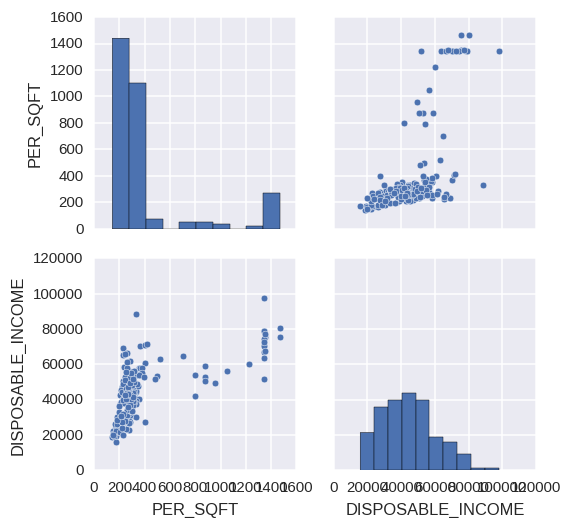

In [352]:
sns.pairplot(feature, vars=["PER_SQFT", "DISPOSABLE_INCOME"])